In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
#defining metrics

def analysis(y_true, y_pred):
    binary_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]
    binary_true = [1 if true >= 0.5 else 0 for true in y_true]

    # continous evaluate
    r2 = metrics.r2_score(y_true, y_pred)
    rmse = np.square(np.subtract(y_true, y_pred)).mean()
    # binary evaluate
    binary_acc = metrics.accuracy_score(binary_true, binary_pred)
    precision = metrics.precision_score(binary_true, binary_pred)
    recall = metrics.recall_score(binary_true, binary_pred)
    f1 = metrics.f1_score(binary_true, binary_pred)
    auc = metrics.roc_auc_score(binary_true, y_pred)
    mcc = metrics.matthews_corrcoef(binary_true, binary_pred)
    TN, FP, FN, TP = metrics.confusion_matrix(binary_true, binary_pred).ravel()
    sensitivity = 1.0 * TP / (TP + FN)
    specificity = 1.0 * TN / (FP + TN)

    result = {
        'r2': r2,
        'rmse': rmse,
        'binary_acc': binary_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'mcc': mcc,
        'sensitivity': sensitivity,
        'specificity': specificity,
    }
    return result

In [3]:
model = joblib.load("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Models\\Stacking_new.sav")
yeast_result = pd.read_excel("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Yeast_data\\Stacking\\fly.xlsx")



yeast_MLP_testing_prediction = yeast_result["MLP"]
yeast_GCN_testing_prediction = yeast_result["GCN"]
yeast_experimental_testing_solubility = yeast_result["solubility"]


yeast_MLP_testing_prediction = yeast_MLP_testing_prediction.values.tolist()
yeast_GCN_testing_prediction = yeast_GCN_testing_prediction.values.tolist()
yeast_experimental_testing_solubility = yeast_experimental_testing_solubility.values.tolist()

In [4]:
yeast_input=np.column_stack((yeast_MLP_testing_prediction, yeast_GCN_testing_prediction))
yeast_target=np.array(yeast_experimental_testing_solubility)

In [5]:
stck_reg_yeast = model.predict(yeast_input)

print("Yeast R2 score:"
        % metrics.r2_score(yeast_target, stck_reg_yeast))

Yeast R2 score:


Text(0, 0.5, 'Experimental solubility')

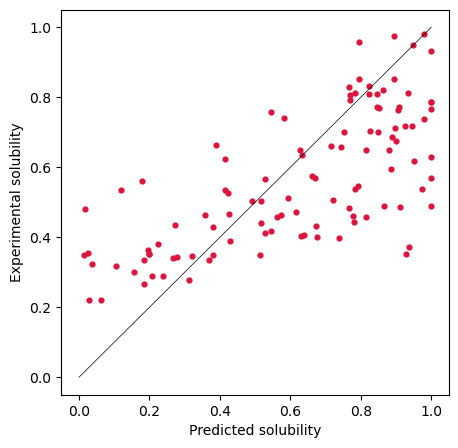

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.plot([0, 1], [0, 1],color='black',linewidth=0.5)
plt.scatter(yeast_target, stck_reg_yeast,s=12, color='crimson')
plt.xlabel('Predicted solubility')
plt.ylabel('Experimental solubility')


In [21]:
analysis(yeast_target,stck_reg_yeast)

{'r2': 0.4535209851432992,
 'rmse': 0.04697668933667956,
 'binary_acc': 0.7407407407407407,
 'precision': 0.8833333333333333,
 'recall': 0.7162162162162162,
 'f1': 0.791044776119403,
 'auc': 0.890302066772655,
 'mcc': 0.47699459889687285,
 'sensitivity': 0.7162162162162162,
 'specificity': 0.7941176470588235}

In [8]:
df_target = pd.DataFrame(yeast_target)
df_prediction = pd.DataFrame(stck_reg_yeast)

merge = [df_target,df_prediction]
yeast_final = pd.concat(merge, axis=1)


yeast_final.to_csv("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Yeast_data\\yeast_final_result_new.csv")

In [19]:
from scipy.stats import pearsonr


# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(yeast_target,stck_reg_yeast)

print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.7051001872086012
p-value: 1.6275237794137697e-17
